## Implementasi Kode Python

Libary yang digunakan :

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Membaca dataset kc_house_data.csv menggunakan pandas :

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.drop(['id','date','condition','yr_built','yr_renovated','zipcode','sqft_lot15','sqft_living15'],
        inplace=True,axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600,0,47.5345,-122.069


Penjelasan Collumn pada dataset tersebut :
1.	Price : Harga rumah
2.	Bedrooms : Banyak kamar tidur
3.	Bathrooms : Banyak kamar mandi
4.	Sqft_living : Luas rumah (ft2)
5.	Sqft_lot : Luas tanah (ft2)
6.	Floors : Banyak tingkat lantai rumah
7.	Waterfront : Adanya waterfront di daerah rumah tersebut
8.	View : Nilai pemandangan rumah
9.	Grade : Kelas Rumah (1-13)
10.	Sqft_above : Luas bagian atas rumah (ft2)
11.	Sqft_Basement : Luas basement rumah (ft2)
12.	Lat : Latitude
13.	Long : Longtitude

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


Visualisasi Data :

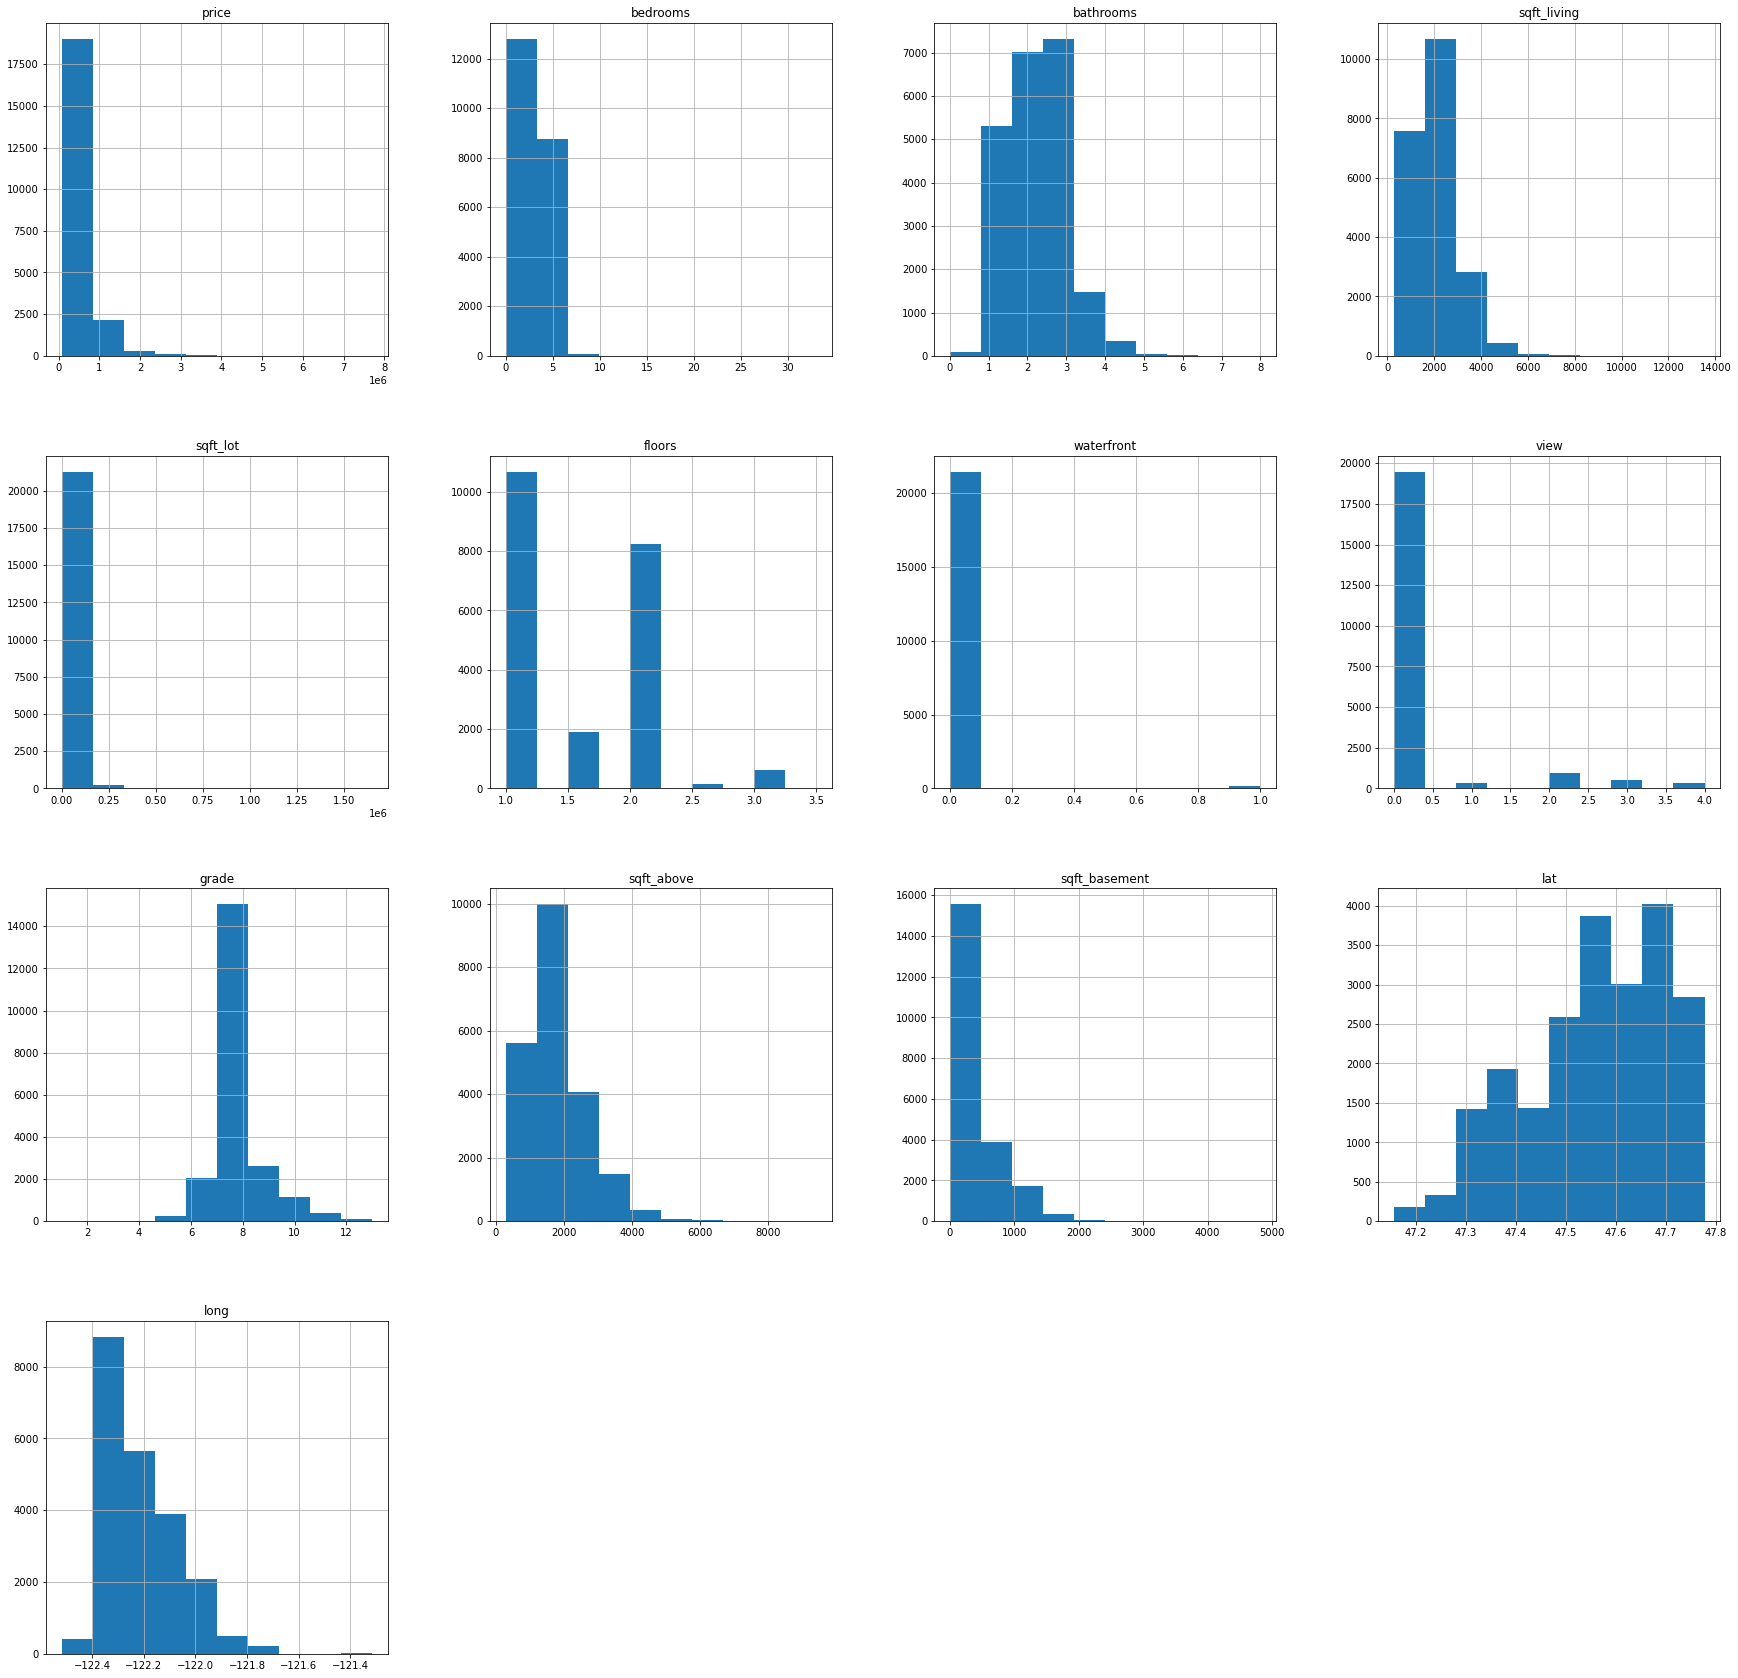

In [4]:
df.hist(figsize=(30,30))
plt.show()

Korelasi Matrix : 

In [5]:
df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,long
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.67,0.61,0.32,0.31,0.02
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.36,0.48,0.30,-0.01,0.13
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,0.66,0.69,0.28,0.02,0.22
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.76,0.88,0.44,0.05,0.24
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,0.11,0.18,0.02,-0.09,0.23
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,0.46,0.52,-0.25,0.05,0.13
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.08,0.07,0.08,-0.01,-0.04
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.25,0.17,0.28,0.01,-0.08
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,1.00,0.76,0.17,0.11,0.20
sqft_above,0.61,0.48,0.69,0.88,0.18,0.52,0.07,0.17,0.76,1.00,-0.05,-0.00,0.34


Memeriksa missing value dalam dataset

In [6]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
dtype: int64

Memeriksa detail isi data dalam dataset tersebut

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000


Mengubah data type bathroom dan floors untuk menjadi interger supaya tidak ada isi data dalam kolom tersebut yang decimal

In [8]:
df['bathrooms'] = df['bathrooms'].astype('int')
df['floors'] = df['floors'].astype('int')
df['bedrooms'] = df['bedrooms'].replace(33,3)

Mendeklarasikan variabel fitur(X) dan variabel target(Y)

In [9]:
X = df.drop(['price'], axis=1)
Y = df['price']

Membagi dataset menjadi train data dan test data dengan rasio 7:3

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

### Model Random Forest Regression

In [81]:
#RFR
reg_RF = RandomForestRegressor(n_estimators = 20)
reg_RF.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=20)

In [82]:
D = np.array([[3,2,1600,2000,1,0,0,7,1500,150,47,-122]])
pred = reg_RF.predict(D)
pred

array([256535.])

In [89]:
from sklearn.metrics import r2_score
Y_pred_RF = reg_RF.predict(X_test)
r2_RF = r2_score(Y_test, Y_pred_RF)
print('R2 (Random Forest Regression):', r2_RF)

R2 (Random Forest Regression): 0.864347084141773


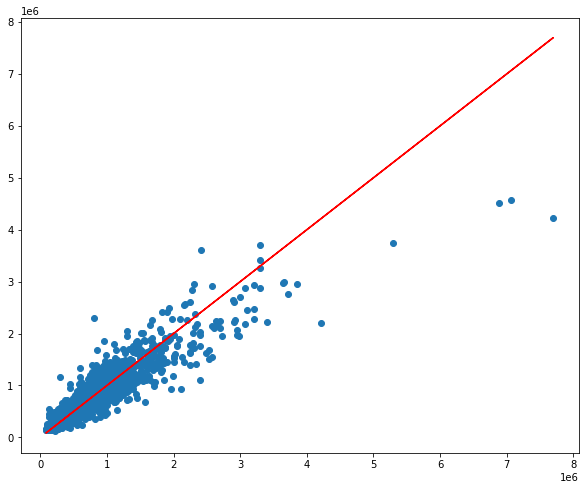

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test,Y_pred_RF)
plt.plot(Y_test,Y_test,color='red')

### Model Decision Tree Regression

In [90]:
reg_DTR = DecisionTreeRegressor()
reg_DTR.fit(X_train,Y_train)

DecisionTreeRegressor()

In [91]:
D = np.array([[3,2,1600,2000,1,0,0,7,1500,150,47,-122]])
pred = reg_DTR.predict(D)
pred

array([380000.])

In [92]:
Y_pred_DTR = reg_DTR.predict(X_test)
r2_DTR = r2_score(Y_test, Y_pred_DTR)
print('R2 (Decision Tree Regression):', r2_DTR)

R2 (Decision Tree Regression): 0.7531694874891083


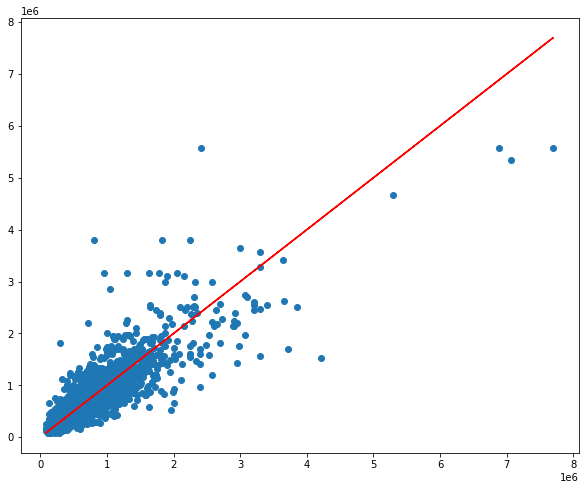

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test,Y_pred_DTR)
plt.plot(Y_test,Y_test,color='red')

### Model Polynomial Regression

In [94]:
PR =  PolynomialFeatures(degree = 2)
reg_LR = LinearRegression()

In [95]:
X_train_PR = PR.fit_transform(X_train)
X_test_PR = PR.transform(X_test)
reg_LR.fit(X_train_PR,Y_train)

LinearRegression()

In [96]:
Y_pred_PR = reg_LR.predict(X_test_PR)
r2_PR = r2_score(Y_test, Y_pred_PR)
print('R2 (Polynomial Regression):', r2_PR)

R2 (Polynomial Regression): 0.7813976915920656


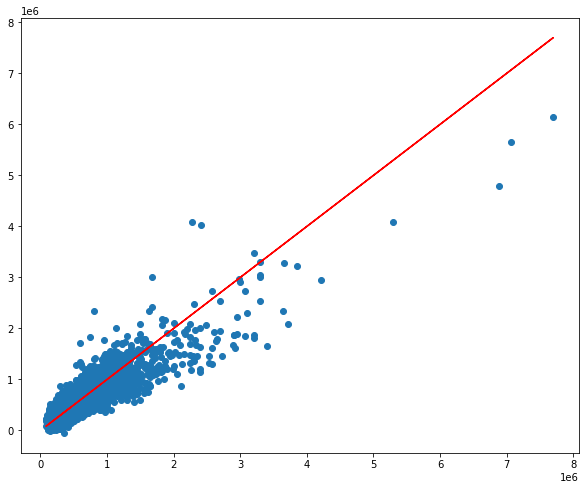

In [97]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test,Y_pred_PR)
plt.plot(Y_test,Y_test,color='red')

### Perbandingan R2 :

In [98]:
print('Perbandingan R2 Score : \n')
print('R2 (Random Forest Regression):', r2_RF)
print('R2 (Decision Tree Regression):', r2_DTR)
print('R2 (Polynomial Regression):', r2_PR)

Perbandingan R2 Score : 

R2 (Random Forest Regression): 0.864347084141773
R2 (Decision Tree Regression): 0.7531694874891083
R2 (Polynomial Regression): 0.7813976915920656


Menyimpan model regresi yang mempunyai akurasi r2 score terbesar untuk digunakan web app nanti

In [85]:
import pickle

In [86]:
data = {"model": reg_RF}
with open('save_step.pkl','wb') as file:
    pickle.dump(data,file)

In [87]:
with open('save_step.pkl', 'rb') as file:
    data = pickle.load(file)
    
reg_load = data["model"]

In [88]:
pred = reg_load.predict(D)
pred

array([256535.])